# 🧠 Predicting Used Car Prices with Regression

In this project, we aim to predict the **selling price** of used cars using various features such as the car’s age, mileage, fuel type, transmission type, and more.  
This is a **regression problem**, and we’ll explore models like **Linear Regression**, **Ridge**, and **Lasso** to identify the best performer.

Dataset Source: [Used Car Dataset - Cardekho](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


##📥 Step 2: Load Dataset

In [13]:
# Upload via Colab file upload or mount drive
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")
df.head()


Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO (1).csv


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


##🔍 Step 3: Explore Dataset

In [14]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


###✅ Step 3.1: Check Actual Column Names

In [15]:
print(df.columns.tolist())

['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


###✅ Step 3.2: Standardize Column Names

In [16]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.title()
print(df.columns.tolist())

['Name', 'Year', 'Selling_Price', 'Km_Driven', 'Fuel', 'Seller_Type', 'Transmission', 'Owner']


##📊 Step 4: Exploratory Data Analysis (EDA)

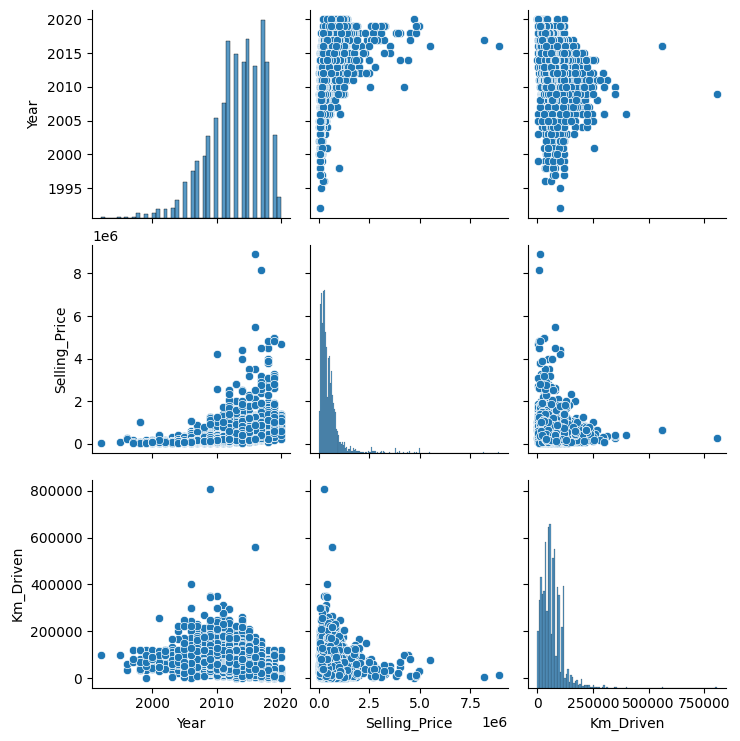

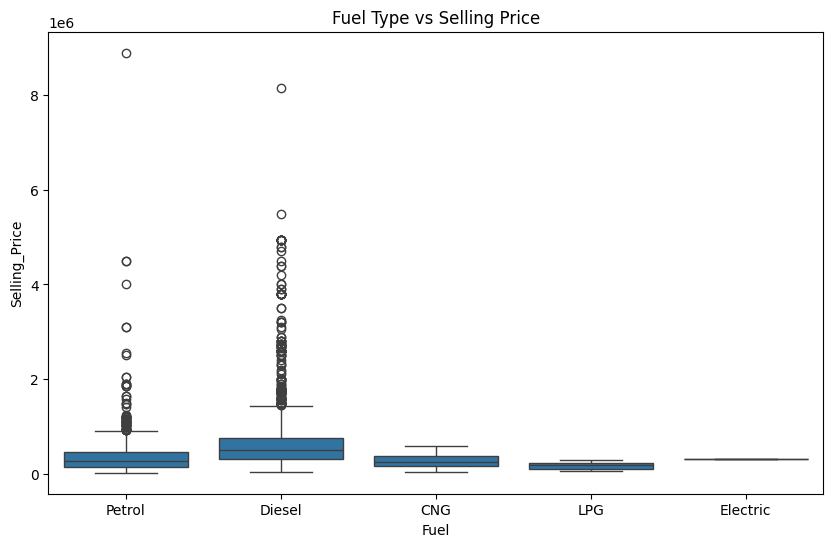

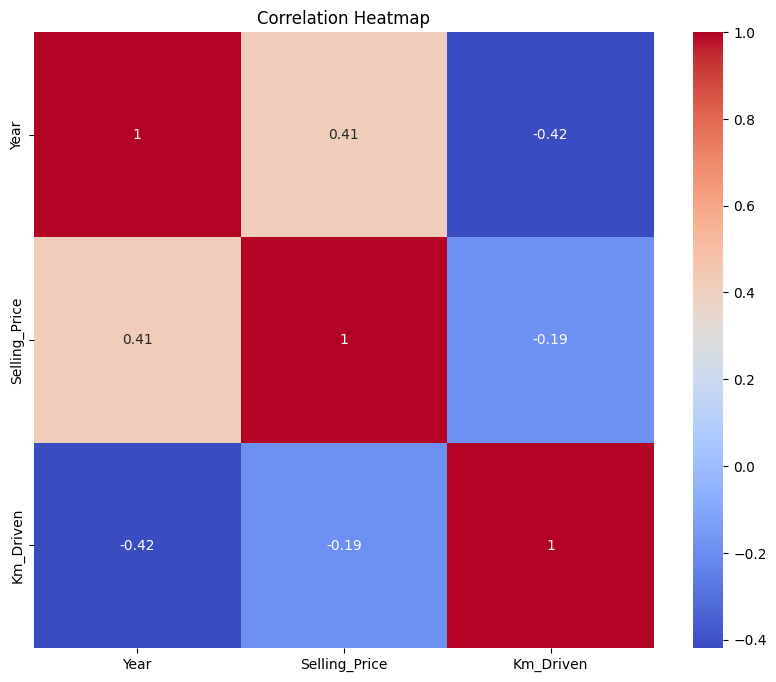

In [17]:
sns.pairplot(df)
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Fuel', y='Selling_Price')  # Or the actual corrected name
plt.title("Fuel Type vs Selling Price")
plt.show()
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


##🧼 Step 5: Preprocessing

In [19]:
df['Current_Year'] = 2020
df['Car_Age'] = df['Current_Year'] - df['Year']
df.drop(['Year', 'Name', 'Current_Year'], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)
df.head()


,Selling_Price,Km_Driven,Car_Age,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,60000,70000,13,False,False,False,True,True,False,True,False,False,False,False
1,135000,50000,13,False,False,False,True,True,False,True,False,False,False,False
2,600000,100000,8,True,False,False,False,True,False,True,False,False,False,False
3,250000,46000,3,False,False,False,True,True,False,True,False,False,False,False
4,450000,141000,6,True,False,False,False,True,False,True,False,True,False,False


##🧪 Step 6: Train-Test Split

In [20]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##🧠 Step 7: Train the Model

In [21]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} R² Score: {r2_score(y_test, preds):.4f}")


Linear Regression R² Score: 0.4031
Ridge Regression R² Score: 0.4034
Lasso Regression R² Score: 0.4031


##✅ Step 8: Evaluate the Model

MAE: 221656.02443614887
MSE: 182079679177.83148
RMSE: 426707.95537209226
R2 Score: 0.4033505636673218


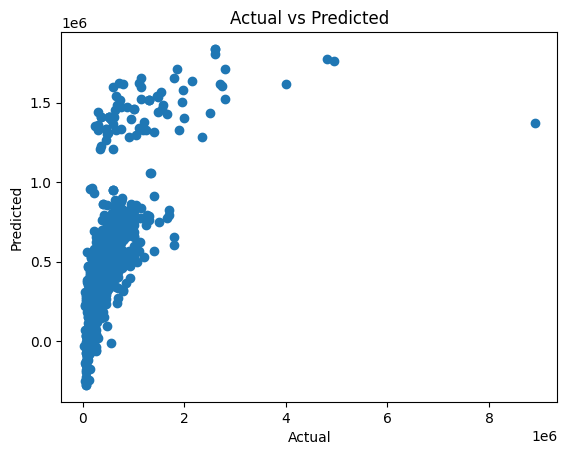

In [22]:
def evaluate(model):
    preds = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, preds))
    print("MSE:", mean_squared_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("R2 Score:", r2_score(y_test, preds))
    plt.scatter(y_test, preds)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")
    plt.show()

evaluate(models['Ridge Regression'])


##💾 Step 10: Save the Model

In [23]:
import joblib
joblib.dump(models['Ridge Regression'], 'ridge_model.pkl')

['ridge_model.pkl']

##🔮 Step 11: Predict on New Data

In [24]:
sample = X_test.iloc[[0]]
predicted_price = models['Ridge Regression'].predict(sample)
print("Predicted Selling Price:", predicted_price[0])

Predicted Selling Price: 429737.73281528614


##💬 Final Summary
- Explored a real-world used car dataset.
- Applied multiple regression models including Ridge and Lasso.
- Ridge Regression performed best with regularization.
- Learned the importance of encoding, feature engineering, and comparison.

##📦 Library Versions

In [25]:
!pip freeze | grep -E 'pandas|numpy|matplotlib|seaborn|scikit-learn|joblib'

geopandas==1.0.1
joblib==1.5.1
matplotlib==3.10.0
matplotlib-inline==0.1.7
matplotlib-venn==1.1.2
numpy==2.0.2
pandas==2.2.2
pandas-datareader==0.10.0
pandas-gbq==0.29.2
pandas-stubs==2.2.2.240909
scikit-learn==1.6.1
seaborn==0.13.2
sklearn-pandas==2.2.0
